<a href="https://colab.research.google.com/github/sysiphe0/dacon/blob/master/2001_semicon_fail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import io

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv('/content/drive/My Drive/train.csv')

In [0]:
test = pd.read_csv('/content/drive/My Drive/test.csv')

In [49]:
train.head()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,0.246511,0.259407,0.260862,0.242524,0.253870,0.245156,0.245548,0.255501,0.228948,0.228632,0.225802,0.249418,0.246910,0.248747,0.251088,0.244886,0.233906,0.242632,0.221792,0.236521,0.220555,0.243761,0.230202,0.226122,0.220671,0.235075,0.224560,0.226998,0.209499,0.226594,...,0.160126,0.164192,0.171406,0.162364,0.168591,0.166626,0.169696,0.196383,0.194145,0.190646,0.186797,0.191748,0.190886,0.208518,0.211220,0.229286,0.226265,0.226954,0.229023,0.237112,0.262421,0.262566,0.272062,0.292049,0.305353,0.292889,0.317479,0.316911,0.321371,0.355636,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,0.191318,0.195369,0.200536,0.197588,0.198726,0.191803,0.199625,0.206465,0.182836,0.193341,0.180459,0.196416,0.185398,0.188913,0.176011,0.173457,0.182249,0.176816,0.192716,0.185924,0.183816,0.186900,0.161040,0.173525,0.172948,0.182634,0.161153,0.158073,0.152335,0.148293,...,0.327076,0.331195,0.337722,0.340189,0.342748,0.351925,0.372989,0.389663,0.396216,0.384977,0.383701,0.403894,0.406382,0.429342,0.409908,0.439307,0.432569,0.439114,0.459541,0.454988,0.475268,0.478575,0.483466,0.496912,0.499542,0.522705,0.524767,0.533952,0.558729,0.572470,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,0.157582,0.158885,0.156911,0.166162,0.148831,0.144950,0.151362,0.145110,0.159201,0.139296,0.145313,0.156555,0.145363,0.150352,0.150542,0.142990,0.139572,0.145669,0.144514,0.126263,0.112832,0.117535,0.111473,0.117545,0.107058,0.119299,0.110768,0.124217,0.124496,0.110023,...,0.525450,0.532645,0.539097,0.527091,0.531925,0.530325,0.551716,0.556125,0.567470,0.549711,0.566789,0.574313,0.569873,0.574390,0.601672,0.584206,0.602981,0.598708,0.615189,0.637023,0.626458,0.645439,0.629203,0.640967,0.652762,0.660495,0.676498,0.674599,0.693535,0.699182,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,0.126962,0.134453,0.106717,0.127309,0.099958,0.112908,0.106853,0.108288,0.101393,0.094074,0.086854,0.099669,0.107276,0.091117,0.084525,0.078293,0.076476,0.078559,0.072960,0.075898,0.067963,0.066055,0.087904,0.065373,0.075469,0.080097,0.068895,0.058148,0.057882,0.063258,...,0.616934,0.638654,0.630914,0.647135,0.629796,0.644114,0.641825,0.645360,0.653030,0.656335,0.657734,0.678019,0.676713,0.681540,0.673333,0.686743,0.697500,0.702650,0.693750,0.711013,0.714411,0.701010,0.726972,0.719394,0.726329,0.730821,0.740062,0.747356,0.749405,0.766173,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,0.097895,0.086765,0.078676,0.075729,0.086023,0.070649,0.078957,0.072772,0.069867,0.080523,0.068273,0.074660,0.069852,0.047442,0.067855,0.049580,0.068737,0.041386,0.048697,0.040278,0.050234,0.059371,0.042581,0.037117,0.041503,0.055113,0.034001,0.035846,0.030385,0.048935,...,0.670888,0.692846,0.673025,0.704448,0.696657,0.697524,0.692513,0.714224,0.696880,0.716361,0.723607,0.720018,0.715039,0.705079,0.720913,0.723440,0.719858,0.729948,0.731360,0.728861,0.740501,0.738362,0.749341,0.738456,0.768791,0.770292,0.766630,0.779970,0.787695,0.766521,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


In [0]:
train.describe()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
count,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,...,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000
mean,155.000000,155.000000,155.000000,155.000000,0.292653,0.292893,0.293125,0.293363,0.293666,0.293994,0.294344,0.294792,0.295325,0.295757,0.296188,0.296762,0.297396,0.298059,0.298745,0.299503,0.300220,0.301024,0.301834,0.302585,0.303395,0.304331,0.305255,0.306159,0.307080,0.307916,0.308737,0.309647,0.310584,0.311537,0.312403,0.313251,0.314086,0.314904,0.315711,0.316522,...,0.515799,0.516212,0.517059,0.518330,0.519609,0.520906,0.522183,0.523519,0.524838,0.526181,0.527548,0.528943,0.530954,0.533822,0.536751,0.539718,0.542706,0.545724,0.548767,0.551864,0.554950,0.558064,0.561231,0.565091,0.569481,0.574082,0.578907,0.583966,0.589218,0.594688,0.600336,0.606206,0.612238,0.618456,0.623942,0.625395,0.627100,0.628997,0.631166,0.633594
std,86.554468,86.554468,86.554468,86.554468,0.181642,0.181857,0.182055,0.182197,0.182361,0.182529,0.182693,0.182858,0.183057,0.183192,0.183337,0.183532,0.183731,0.183932,0.184135,0.184367,0.184559,0.184800,0.185021,0.185242,0.185466,0.185706,0.185972,0.186212,0.186465,0.186681,0.186877,0.187115,0.187331,0.187556,0.187732,0.187905,0.188082,0.188232,0.188361,0.188493,...,0.209915,0.209691,0.209475,0.209221,0.208968,0.208739,0.208539,0.208366,0.208186,0.208027,0.207935,0.207825,0.207651,0.207415,0.207167,0.206929,0.206699,0.206484,0.206228,0.205982,0.205727,0.205514,0.205216,0.204812,0.204335,0.203782,0.203131,0.202415,0.201604,0.200721,0.199727,0.198644,0.197473,0.196177,0.195028,0.194909,0.194730,0.194493,0.194146,0.193725
min,10.000000,10.000000,10.000000,10.000000,-0.014902,-0.014798,-0.014897,-0.014709,-0.014903,-0.014662,-0.014924,-0.014789,-0.014775,-0.014945,-0.014818,-0.014792,-0.014751,-0.014926,-0.014878,-0.014824,-0.014904,-0.014811,-0.014950,-0.014979,-0.014780,-0.014970,-0.014883,-0.015064,-0.014947,-0.014940,-0.014819,-0.014870,-0.014717,-0.014732,-0.014987,-0.014754,-0.014905,-0.014728,-0.014683,-0.014827,...,-0.014814,-0.015110,-0.014201,-0.014504,-0.014645,-0.014396,-0.014689,-0.014374,-0.014852,-0.014072,-0.014635,-0.014340,-0.014414,-0.014129,-0.013891,-0.014385,-0.014613,-0.013654,-0.014283,-0.014053,-0.014433,-0.013465,-0.010545,-0.014733,-0.014524,-0.014323,-0.013598,-0.012928,-0.012640,-0.012806,-0.011992,-0.008661,-0.011430,-0.009827,-0.007632,-0.007411,-0.007073,-0.007101,-0.005519,-0.006074
25%,80.000000,80.000000,80.000000,80.000000,0.135139,0.135180,0.135258,0.135478,0.135585,0.135705,0.135858,0.136423,0.136704,0.136993,0.137269,0.137756,0.138130,0.138556,0.139140,0.139715,0.140296,0.140825,0.141515,0.142154,0.142753,0.143431,0.144334,0.145081,0.145881,0.146606,0.147193,0.148069,0.

In [5]:
train.corr()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
layer_1,1.000000,0.000000,0.000000,0.000000,0.025131,0.028438,0.031627,0.034604,0.037328,0.039997,0.042315,0.044646,0.046603,0.048333,0.049969,0.051389,0.052517,0.053454,0.054228,0.054889,0.055138,0.055294,0.055153,0.054780,0.054229,0.053391,0.052287,0.051108,0.049676,0.047884,0.046001,0.043843,0.041460,0.038707,0.035982,0.032747,0.029528,0.026127,0.022420,0.018675,...,-0.008427,-0.009693,-0.010847,-0.012007,-0.013002,-0.013794,-0.014581,-0.015198,-0.015705,-0.016174,-0.016393,-0.016504,-0.016455,-0.016323,-0.015929,-0.015561,-0.015002,-0.014390,-0.013663,-0.012909,-0.012099,-0.011305,-0.010348,-0.009539,-0.008684,-0.007725,-0.006933,-0.006182,-0.005310,-0.004580,-0.003803,-0.003171,-0.002531,-0.002017,-0.001593,-0.000977,-0.000626,-0.000356,0.000089,0.000164
layer_2,0.000000,1.000000,0.000000,0.000000,0.009764,0.006438,0.002967,-0.000276,-0.003360,-0.006291,-0.009019,-0.011649,-0.014044,-0.016112,-0.018119,-0.019892,-0.021347,-0.022548,-0.023547,-0.024326,-0.024921,-0.025094,-0.025276,-0.025029,-0.024558,-0.023992,-0.023253,-0.022232,-0.021125,-0.019766,-0.018333,-0.016881,-0.015144,-0.013429,-0.011779,-0.010023,-0.008161,-0.006277,-0.004554,-0.003080,...,0.003899,0.003521,0.002991,0.002707,0.002416,0.002055,0.001629,0.001418,0.001119,0.000791,0.000519,0.000150,-0.000114,-0.000388,-0.000869,-0.001099,-0.001407,-0.001761,-0.002172,-0.002540,-0.002954,-0.003206,-0.003667,-0.004046,-0.004580,-0.004967,-0.005316,-0.005690,-0.006089,-0.006414,-0.006839,-0.007104,-0.007467,-0.007831,-0.008084,-0.008480,-0.008669,-0.008946,-0.009137,-0.009350
layer_3,0.000000,0.000000,1.000000,0.000000,0.007750,0.008678,0.009588,0.010486,0.011312,0.012110,0.013096,0.014099,0.014958,0.015946,0.016973,0.018022,0.019035,0.020230,0.021350,0.022563,0.023724,0.024927,0.026235,0.027600,0.028867,0.030119,0.031369,0.032581,0.033608,0.034718,0.035575,0.036442,0.037057,0.037419,0.037769,0.037829,0.037849,0.037444,0.036867,0.035923,...,-0.005057,-0.006178,-0.007150,-0.007957,-0.008590,-0.009252,-0.009677,-0.010018,-0.010291,-0.010443,-0.010453,-0.010323,-0.010099,-0.009773,-0.009367,-0.009040,-0.008465,-0.007927,-0.007268,-0.006771,-0.006163,-0.005652,-0.005035,-0.004612,-0.004190,-0.003836,-0.003488,-0.003245,-0.002780,-0.002672,-0.002344,-0.002134,-0.001975,-0.001770,-0.001638,-0.001362,-0.001153,-0.000897,-0.000727,-0.000493
layer_4,0.000000,0.000000,0.000000,1.000000,-0.055764,-0.061227,-0.066401,-0.070796,-0.074673,-0.078173,-0.081075,-0.083392,-0.085309,-0.086667,-0.087622,-0.087935,-0.087946,-0.087549,-0.086506,-0.085270,-0.083615,-0.081565,-0.079172,-0.076548,-0.073556,-0.070380,-0.066908,-0.063085,-0.059063,-0.054998,-0.050763,-0.046442,-0.041833,-0.037195,-0.032487,-0.027714,-0.022856,-0.018075,-0.013263,-0.008528,...,0.006355,0.003895,0.001195,-0.001458,-0.004278,-0.007032,-0.009800,-0.012636,-0.015459,-0.018301,-0.021215,-0.024132,-0.027029,-0.029953,-0.032902,-0.035858,-0.038612,-0.041305,-0.044123,-0.046674,-0.049307,-0.051710,-0.054145,-0.056738,-0.059237,-0.061642,-0.063891,-0.065895,-0.067737,-0.069310,-0.070715,-0.071827,-0.072792,-0.073316,-0.073869,-0.074184,-0.074345,-0.074135,-0.073760,-0.073234
0,0.025131,0.009764,0.007750,-0.055764,1.000000,0.990188,0.967773,0.931161,0.881628,0.820718,0.749831,0.671178,0.587024,0.499474,0.410657,0.322247,0.236132,0.154147,0.077421,0.007259,-0.055639,-0.110657,-0.157255,-0.195149,-0.224626,-0.245580,-0.258594,-0.264169,-0.262859,-0.255447,-0.242923,-0.225986,-0.205749,-0.183019,-0.158733,-0.133668,-0.108761,-0.084605,-0.061842,-0.041033,...,-0.027634,-0.026976,-0.026189,-0.025342,-0.024272,-0.023355,-0.022249,-0.021259,-0.020095,-0.019028,-0.018121,-0.017267,-0.016427,-0.015721,-0.015073,-0.014511,-0.013928,-0.01357

In [0]:
#@title 기본 제목 텍스트
#독립변수와 종속변수를 분리합니다.
from sklearn.model_selection import train_test_split
np.random.seed(3)
x_train = train.iloc[:,4:]  #Train 데이터의 독립변수
y_train = train.iloc[:,0:4] #Train 데이터의 종속변수
#x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
x_test = test.iloc[:,1:]    #Test  데이터의 독립변수

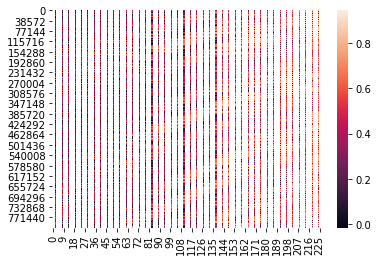

In [9]:
sns.heatmap(x_train)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4fa9217f0>,
      dtype=object)

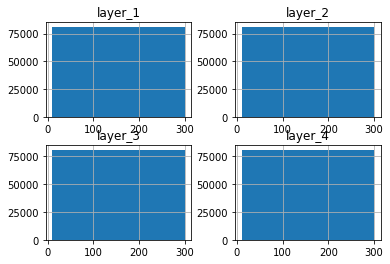

In [10]:
y_train.hist()

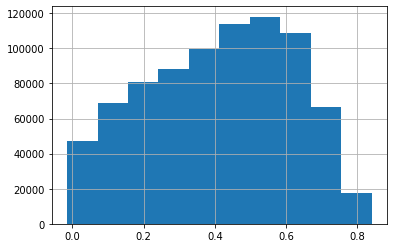

In [17]:
x_train['121'].hist()

In [0]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
model = Sequential()
model.add(Dense(units=570, activation='relu', input_dim=226))
model.add(Dropout(0.2))
model.add(Dense(units=570, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=570, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=570, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=570, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=570, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=4, activation='linear'))
#모델을 컴파일합니다.
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [0]:
early_stopping = EarlyStopping(patience=3)

In [69]:
#모델을 학습합니다.
hist = model.fit(x_train, y_train, epochs=10, batch_size=20, validation_split = 0.05, callbacks=[early_stopping])

Train on 769500 samples, validate on 40500 samples
Epoch 1/10
769500/769500 [==============================] - 238s 309us/step - loss: 49.3042 - mean_absolute_error: 49.3042 - val_loss: 47.2959 - val_mean_absolute_error: 47.2959
Epoch 2/10
769500/769500 [==============================] - 235s 306us/step - loss: 39.9629 - mean_absolute_error: 39.9629 - val_loss: 44.5980 - val_mean_absolute_error: 44.5980
Epoch 3/10
769500/769500 [==============================] - 235s 306us/step - loss: 37.2369 - mean_absolute_error: 37.2369 - val_loss: 41.8853 - val_mean_absolute_error: 41.8853
Epoch 4/10
769500/769500 [==============================] - 235s 306us/step - loss: 35.9271 - mean_absolute_error: 35.9271 - val_loss: 40.0937 - val_mean_absolute_error: 40.0937
Epoch 5/10
 62280/769500 [=>............................] - ETA: 3:31 - loss: 35.4651 - mean_absolute_error: 35.4651

KeyboardInterrupt: ignored

In [0]:
#예측값을 생성합니다.
pred_test = model.predict(x_test)
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('/content/drive/My Drive/sample_submission.csv', index_col=0)
pred_test_new = np.rint(pred_test/10)*10
submission = sample_sub+pred_test_new
submission.to_csv('submission_200202_4.csv')




Train on 769500 samples, validate on 40500 samples
Epoch 1/1





769500/769500 [==============================] - 190s 248us/step - loss: 30.1126 - mean_absolute_error: 30.1126 - val_loss: 31.1030 - val_mean_absolute_error: 31.1030


In [0]:

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

mae_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

mae_ax.plot(hist.history['mean_absolute_error'], 'b', label='train mae')
mae_ax.plot(hist.history['val_mean_absolute_error'], 'g', label='val mae')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
mae_ax.set_ylabel('mae')

loss_ax.legend(loc='upper left')
mae_ax.legend(loc='lower left')

plt.show()

#예측값을 생성합니다.
pred_test = model.predict(x_test)
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('/content/drive/My Drive/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission_200202_2.csv')